In [20]:
csv_path = 'C:/Users/User/mywork/project01/sqlResult_1558435.csv'

In [21]:
import pandas as pd

In [22]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [23]:
content = content.fillna('')

In [24]:
news_content = content['content'].tolist()

In [6]:
import jieba

In [7]:
def cut(string): return ' '.join(jieba.cut(string))

In [8]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 3.122 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [8]:
import re

In [9]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [11]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [10]:
news_content = [token(n) for n in news_content]

In [11]:
news_content = [' '.join(n) for n in news_content]

In [12]:
news_content = [cut(n) for n in news_content]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 3.037 seconds.
Prefix dict has been built succesfully.


KeyboardInterrupt: 

In [15]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [16]:
with open('news-sentences-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [1]:
from gensim.models import Word2Vec

In [2]:
from gensim.models.word2vec import LineSentence

In [4]:
news_word2ve= Word2Vec(LineSentence(open('news-sentences-cut.txt','r',encoding = 'gb18030',errors='ignore')), size=35, workers=8)

D:\tobeabetterman\tools\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


KeyboardInterrupt: 

In [8]:
import gensim
news_word2ve = gensim.models.word2vec.Word2Vec.load("Word2vec.w2v").wv

In [9]:
news_word2ve.most_similar('说', topn=30)

[('表示', 0.9002997875213623),
 ('认为', 0.8447468876838684),
 ('指出', 0.8427241444587708),
 ('看来', 0.8052114248275757),
 ('明说', 0.7910041809082031),
 ('称', 0.7672169804573059),
 ('坦言', 0.7502412796020508),
 ('文说', 0.7366256713867188),
 ('介绍', 0.7300548553466797),
 ('告诉', 0.7265288829803467),
 ('特别强调', 0.7194773554801941),
 ('透露', 0.7071252465248108),
 ('强调', 0.6941632032394409),
 ('中说', 0.6786888837814331),
 ('称赞', 0.6766875982284546),
 ('所说', 0.6691125631332397),
 ('提到', 0.6321943998336792),
 ('深有体会', 0.6026611328125),
 ('建议', 0.600321352481842),
 ('写道', 0.6002739667892456),
 ('纳说', 0.583228349685669),
 ('时说', 0.5790384411811829),
 ('说道', 0.5758864879608154),
 ('如是说', 0.5736161470413208),
 ('的话', 0.5685911178588867),
 ('地说', 0.5515662431716919),
 ('镐', 0.549983024597168),
 ('颇深', 0.5493456125259399),
 ('直言', 0.5475574135780334),
 ('曼说', 0.5465236902236938)]

In [10]:
news_word2ve.most_similar('认为', topn=30)

[('指出', 0.9182546138763428),
 ('表示', 0.8814195394515991),
 ('说', 0.8447469472885132),
 ('看来', 0.833301305770874),
 ('称', 0.8172537088394165),
 ('坦言', 0.7660394310951233),
 ('建议', 0.7492708563804626),
 ('普遍认为', 0.7379234433174133),
 ('强调', 0.7315503358840942),
 ('透露', 0.7249681949615479),
 ('特别强调', 0.7018728852272034),
 ('所说', 0.6948210000991821),
 ('观点', 0.638931155204773),
 ('表明', 0.6373517513275146),
 ('对此', 0.6349701881408691),
 ('看法', 0.631763756275177),
 ('告诉', 0.6301299333572388),
 ('称赞', 0.6265140771865845),
 ('声称', 0.6225423812866211),
 ('相信', 0.6150899529457092),
 ('提到', 0.6120508313179016),
 ('电影界', 0.6117475628852844),
 ('呼吁', 0.6113141775131226),
 ('明说', 0.6108672618865967),
 ('及其', 0.6083630919456482),
 ('中称', 0.6058492660522461),
 ('猜测', 0.6044807434082031),
 ('介绍', 0.6028688549995422),
 ('中说', 0.6003395318984985),
 ('做法', 0.6002458333969116)]

In [11]:
news_word2ve.most_similar('建议', topn=10)

[('认为', 0.7492708563804626),
 ('要求', 0.7255094647407532),
 ('指出', 0.710199773311615),
 ('表示', 0.6895305514335632),
 ('强调', 0.6760668158531189),
 ('意见建议', 0.6596482396125793),
 ('鼓励', 0.6401159167289734),
 ('解释', 0.6401046514511108),
 ('提醒', 0.6368593573570251),
 ('慎重', 0.6367899179458618)]

In [12]:
from collections import defaultdict

In [13]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [14]:
len(news_word2ve.wv.vocab)

D:\tobeabetterman\tools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


97928

In [15]:
related_words = get_related_words(['说', '表示'], news_word2ve)

seen length : 0
seen length : 50
seen length : 50
seen length : 100
seen length : 150
seen length : 150
seen length : 200
seen length : 200
seen length : 200
seen length : 250
seen length : 300
seen length : 350
seen length : 400
seen length : 450


In [16]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('指出', 81),
 ('表示', 80),
 ('说', 74),
 ('认为', 72),
 ('所说', 69),
 ('特别强调', 59),
 ('透露', 59),
 ('看来', 58),
 ('坦言', 58),
 ('提到', 57),
 ('明说', 49),
 ('称', 49),
 ('文说', 38),
 ('中说', 37),
 ('强调', 35),
 ('称赞', 34),
 ('告诉', 33),
 ('直言', 28),
 ('介绍', 27),
 ('建议', 27),
 ('中称', 27),
 ('提及', 23),
 ('写道', 22),
 ('普遍认为', 21),
 ('声称', 17),
 ('说法', 17),
 ('证实', 17),
 ('解释', 17),
 ('如是说', 16),
 ('张伟', 14),
 ('确信', 13),
 ('宣称', 13),
 ('说道', 13),
 ('所指', 13),
 ('形容', 13),
 ('深有体会', 12),
 ('直言不讳', 12),
 ('相信', 11),
 ('颇深', 11),
 ('引用', 11),
 ('描述', 11),
 ('表明', 10),
 ('提出', 10),
 ('眼中', 10),
 ('还称', 10),
 ('阐述', 10),
 ('呼吁', 10),
 ('谈论', 9),
 ('披露', 9),
 ('知情', 9),
 ('想法', 9),
 ('感叹', 8),
 ('承认', 8),
 ('抛出', 8),
 ('现阶段', 8),
 ('看法', 7),
 ('东升', 7),
 ('福海', 7),
 ('地说', 7),
 ('谈及', 7),
 ('建中', 7),
 ('远远不够', 7),
 ('毫不客气', 7),
 ('不在意', 7),
 ('追究责任', 7),
 ('特别感谢', 7),
 ('惠阳', 7),
 ('公道', 7),
 ('问过', 7),
 ('感谢', 7),
 ('反驳', 7),
 ('给出', 7),
 ('做法', 7),
 ('质疑', 7),
 ('批评', 7),
 ('观点', 6),
 ('来说', 6),
 ('而言', 6),


In [25]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [26]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [27]:
document_frequency('的')

70342

In [28]:
import math

In [29]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [30]:
idf('的') < idf('小米')

True

In [31]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [32]:
content['content'][11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [33]:
tf('银行', news_content[11])

0

In [34]:
tf('创业板', news_content[11])

0

In [35]:
idf('创业板')

2.5052032924502545

In [36]:
idf('银行')

1.4550169427748936

In [37]:
idf('短期')

1.9899919881224526

In [38]:
tf('短期', news_content[11])

0

In [39]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [40]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [41]:
news_content[11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [42]:
%prun get_keywords_of_a_ducment(news_content[0])

In [43]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[101])

In [44]:
news_content[101]

'中国经济网6月23日讯（记者刘瑾）日前，中国机械工业百强企业、汽车三十强企业名单出炉。在由中国机械工业联合会、中国汽车工业协会主办的“中国机械工业百强企业、汽车工业三十强企业信息发布会”上，中国机械工业联合会会长王瑞祥指出，入围企业总体呈现了持续增长态势，2016年总规模、平均规模均创新高，我国机械工业总体上呈现稳中向好的发展态势，主要经济指标出现恢复性增长。\r\n同时，王瑞祥也表示，机械工业长期积累的结构性矛盾还没有根本性改变，新的发展业态、发展模式远未形成，保持平稳健康发展的基础还不牢固，产业升级、新旧动能转换、实现由大变强任重道远。\r\n相关数据显示，2016年机械百强入围企业规模是15.4亿元，比上年略高。总规模达到16992亿元，平均规模169.92亿元，两项均创新高。相比前两年的前十强排名，名单基本没有什么变化，只是工程机械行业的徐工、三一和中联重科由于之前市场环境等原因，整体排位后移了一两位，但仍全部在十强之列。但考虑到工程机械行业最近以来的强烈增长态势，明年该行业整体恢复性可能较大。\r\n中机联执行副会长陈斌表示，机械百强的年换位率2005年曾高达32%，此后逐年下降，2012年降至6%，不过近几年又在上升，2016年升至22%，说明市场动荡，不确定因素增加。\r\n根据中机联公布的数据，2017年1至5月机械增加值增速好于去年但呈现逐月回落的态势，比如1至5月增速为10.7，比1至4月回落0.2点。此外利润总额也出现了同样的走势。专家分析，这是由于钢铁等原材料价格近期出现较大增幅，使得工业企业成本压力增大。\r\n“产量同比增长表现抢眼的是工程机械类产品，已经有8个月保持高速增长。”同时，陈斌也表示了担忧，比如价格指数缓慢回升但远低于工业、原材料指数，固定资产投资增速仍较低迷，增速在多年回落之后继续在低位震荡徘徊。他表示，行业经济运行仍面临一定的下行压力，机械行业主要服务的钢铁、煤炭、电力及石油、化工等行业普遍处于产业结构深度调整期，其装备需求短期难以大幅增长。还有经过多年的高速发展，各类机械产品的社会保有量均达到了相当规模，对现役设备的更新改造维护已成为需求中的重要部分，这增加了增量回升的难度。\r\n'

In [45]:
get_keywords_of_a_ducment(news_content[101])

[('同时，王瑞祥也表示，机械工业长期积累的结构性矛盾还没有根本性改变，新的发展业态、发展模式远未形成，保持平稳健康发展的基础还不牢固，产业升级、新旧动能转换、实现由大变强任重道远。',
  4.9523613237924735),
 ('中机联执行副会长陈斌表示，机械百强的年换位率2005年曾高达32%，此后逐年下降，2012年降至6%，不过近几年又在上升，2016年升至22%，说明市场动荡，不确定因素增加。',
  4.9523613237924735),
 ('相关数据显示，2016年机械百强入围企业规模是15.4亿元，比上年略高。总规模达到16992亿元，平均规模169.92亿元，两项均创新高。相比前两年的前十强排名，名单基本没有什么变化，只是工程机械行业的徐工、三一和中联重科由于之前市场环境等原因，整体排位后移了一两位，但仍全部在十强之列。但考虑到工程机械行业最近以来的强烈增长态势，明年该行业整体恢复性可能较大。',
  4.9523613237924735),
 ('“产量同比增长表现抢眼的是工程机械类产品，已经有8个月保持高速增长。”同时，陈斌也表示了担忧，比如价格指数缓慢回升但远低于工业、原材料指数，固定资产投资增速仍较低迷，增速在多年回落之后继续在低位震荡徘徊。他表示，行业经济运行仍面临一定的下行压力，机械行业主要服务的钢铁、煤炭、电力及石油、化工等行业普遍处于产业结构深度调整期，其装备需求短期难以大幅增长。还有经过多年的高速发展，各类机械产品的社会保有量均达到了相当规模，对现役设备的更新改造维护已成为需求中的重要部分，这增加了增量回升的难度。',
  4.9523613237924735),
 ('根据中机联公布的数据，2017年1至5月机械增加值增速好于去年但呈现逐月回落的态势，比如1至5月增速为10.7，比1至4月回落0.2点。此外利润总额也出现了同样的走势。专家分析，这是由于钢铁等原材料价格近期出现较大增幅，使得工业企业成本压力增大。',
  4.9523613237924735),
 ('中国经济网6月23日讯（记者刘瑾）日前，中国机械工业百强企业、汽车三十强企业名单出炉。在由中国机械工业联合会、中国汽车工业协会主办的“中国机械工业百强企业、汽车工业三十强企业信息发布会”上，中国机械工业联合会会长王瑞祥指出，入围企业总体呈现了持续增长态势

In [47]:
import wordcloud

In [48]:
wc = wordcloud.WordCloud('C:/Users/User\mywork/lession6/SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [49]:
news_content[4]

'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的

In [50]:
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [53]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

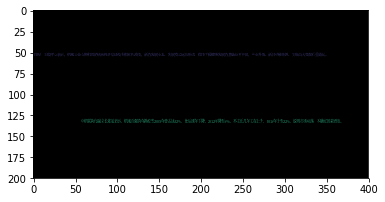

In [57]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [58]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[4])

In [59]:
shenzhen_social_news

[('其实真爱的到来并不存在年龄的限制', 4.9523613237924735),
 ('南都记者带您一起还原现场', 4.9523613237924735),
 ('@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。',
  4.9523613237924735),
 ('去年6月7号上午，淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话，一名女子言语不清，声称自己遭到了侵害。女子、被侵害、言语不清，几个关键词令接到电话的民警瞬间紧张起来。',
  4.9523613237924735),
 ('大大君只希望姑娘能早点康复', 4.9523613237924735),
 ('男子迷奸网友拍418个视频', 4.9523613237924735),
 ('女方从20岁到50岁不等', 4.9523613237924735),
 ('就这样，我被牵着走了大概十多分钟，天突然下起了大暴雨，雨大的连眼睛都睁不开”刘青继续说着，瞬间他们就被雨透了，但女子依然不愿意接受刘青的帮助，就继续冒着大雨往前走。',
  4.9523613237924735),
 ('南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。', 4.9523613237924735),
 ('你们说呢？', 4.9523613237924735),
 ('到底都发生了些什么呢？', 4.9523613237924735),
 ('（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）', 4.9523613237924735),
 ('因善良的原因', 4.9523613237924735),
 ('那么事发时', 4.9523613237924735),
 ('大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。',
  4.651331328128492),
 ('一众网友纷纷为', 4.651331328128492),
 ('恐怕大家都没办法淡定', 4.651331328128

In [60]:
from PIL import Image

In [61]:
import numpy as np

In [62]:
police_mask = np.array(Image.open('C:/Users/User/mywork/lession6/pikachao.jpg'))

In [63]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='C:/Users/User\mywork/lession6/SourceHanSerifSC-Regular.otf', 
mask=police_mask
)

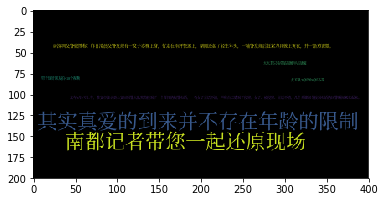

In [65]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

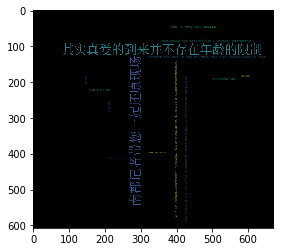

In [66]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vectorized = TfidfVectorizer(max_features=10000)

In [69]:
sample_num = 10000
sub_samples = news_content[:sample_num]

In [70]:
X = vectorized.fit_transform(sub_samples)

In [71]:
X.shape

(10000, 10000)

In [72]:
vectorized.vocabulary_

{'此外': 6935,
 '6月12日': 779,
 '当然': 5399,
 '相反': 7770,
 '报道称': 5841,
 '资料显示': 9057,
 'wi': 1340,
 '按计划': 5900,
 '128gb': 103,
 '原标题': 3593,
 '记者发现': 8853,
 '就这样': 5015,
 '据警方透露': 5980,
 '目前': 7736,
 '警察': 8800,
 '女子': 4675,
 '分析人士认为': 3234,
 '一九': 1366,
 '再现': 3144,
 '周四': 3961,
 '29个中信一级行业中': 434,
 '80': 900,
 '和0': 3972,
 '20': 238,
 '22': 395,
 '82': 911,
 '64': 736,
 '34': 481,
 '06': 33,
 '其中': 3066,
 '66': 742,
 '65': 740,
 '上海银行': 1584,
 '华夏银行': 3504,
 '50': 611,
 '57': 637,
 '和3': 3976,
 '04': 24,
 '华安证券': 3505,
 '相对而言': 7771,
 '近期': 9212,
 '73': 858,
 '11': 78,
 '26': 420,
 '2013': 268,
 '那么': 9428,
 '近日': 9208,
 '660': 743,
 '配备有': 9482,
 '4gb': 576,
 '采用': 9494,
 '14': 120,
 'oppo': 1260,
 '不过': 1670,
 '由于': 7559,
 '至今': 8527,
 '28': 426,
 '12': 92,
 '沙漠雄鹰': 7052,
 '但在': 2650,
 '黑天鹅': 9974,
 '短期蓝筹股上演的指数行情令市场承压': 7834,
 '短期利好带动的蓝筹股行情或将告一段落': 7829,
 '债券通': 2866,
 '显示': 6424,
 '6月26日': 828,
 '十三五': 3468,
 '45点': 561,
 '76点': 870,
 '跌幅为0': 9115,
 '深成指报10265': 7214,
 '20点': 381,
 

In [73]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0], dtype=int64), array([ 779, 5399, 6935], dtype=int64))

In [74]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [75]:
vectorized.vocabulary_

{'此外': 6935,
 '6月12日': 779,
 '当然': 5399,
 '相反': 7770,
 '报道称': 5841,
 '资料显示': 9057,
 'wi': 1340,
 '按计划': 5900,
 '128gb': 103,
 '原标题': 3593,
 '记者发现': 8853,
 '就这样': 5015,
 '据警方透露': 5980,
 '目前': 7736,
 '警察': 8800,
 '女子': 4675,
 '分析人士认为': 3234,
 '一九': 1366,
 '再现': 3144,
 '周四': 3961,
 '29个中信一级行业中': 434,
 '80': 900,
 '和0': 3972,
 '20': 238,
 '22': 395,
 '82': 911,
 '64': 736,
 '34': 481,
 '06': 33,
 '其中': 3066,
 '66': 742,
 '65': 740,
 '上海银行': 1584,
 '华夏银行': 3504,
 '50': 611,
 '57': 637,
 '和3': 3976,
 '04': 24,
 '华安证券': 3505,
 '相对而言': 7771,
 '近期': 9212,
 '73': 858,
 '11': 78,
 '26': 420,
 '2013': 268,
 '那么': 9428,
 '近日': 9208,
 '660': 743,
 '配备有': 9482,
 '4gb': 576,
 '采用': 9494,
 '14': 120,
 'oppo': 1260,
 '不过': 1670,
 '由于': 7559,
 '至今': 8527,
 '28': 426,
 '12': 92,
 '沙漠雄鹰': 7052,
 '但在': 2650,
 '黑天鹅': 9974,
 '短期蓝筹股上演的指数行情令市场承压': 7834,
 '短期利好带动的蓝筹股行情或将告一段落': 7829,
 '债券通': 2866,
 '显示': 6424,
 '6月26日': 828,
 '十三五': 3468,
 '45点': 561,
 '76点': 870,
 '跌幅为0': 9115,
 '深成指报10265': 7214,
 '20点': 381,
 

In [76]:
import random 

In [77]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [78]:
document_id_1

370

In [79]:
document_id_2

144

In [80]:
news_content[document_id_1]

'有人在朋友圈晒图表示“来公司加班一脸懵逼，据说全是凌晨抢不到准备来公司抢的”。\r\n照片中，一群女孩正在美图公司排队，从大厅一直拍到了门外，相当有人气。\r\n不过这帮女孩子的着装也引起网友的好奇：穿cos服要加钱吗？穿成这样属性有加成吗？\r\n据悉，美图M8美少女战士限量版是美图手机首次基于知名动漫IP美少女战士定制，不仅在产品包装、手机后盖、配件等外部融入美少女战士元素进行专属外观设计，更拥有专属UI主题和定制的配件组合。\r\n'

In [81]:
news_content[document_id_2]

'卡佩罗空降中超，这让饱受足协新规摧残的中国足坛再次热闹起来，关于这名71岁的老人时隔2年后再出山，中国足坛分隔成了两大派，一派就是支持者，这名冠军收割机教练，苏宁给他时间定能看到冠军，一派是反对者，执教末期赚最后的一笔大合同。\r\n对于卡佩罗来说，这个时候来到江苏苏宁显然不是最好的时机，因为新规的出炉让他几乎无法享受他以往在尤文、皇马时期的金元投入，而且他也没有带过苏宁这样的保级球队，目前手上能用的将士除了三大外援，苏宁的本土球员就是矮子里挑将军凑合着用，这对于卡佩罗来说是极大的挑战。\r\n在卡佩罗上任的新闻发布会上，卡佩罗直言首要任务就是带领江苏苏宁从降级区里走出来，然后再考虑其他的事情，纵使见过大风大浪的卡佩罗也是明显感受到如今的艰难，这个保级任务非常艰巨。因为卡佩罗口中的保级目标，将面对太多内忧外患的东西，比如接下来的比赛里，江苏苏宁将迎来一波魔鬼赛程。\r\n本周末联赛江苏苏宁将在主场迎战长春亚泰，本场比赛后下周将是一周双赛，周中足协杯对阵河南建业，随后中超联赛上半程最后两场比赛是对阵国安和上港，对于江苏苏宁来说，是极具考验的两场比赛，能否跨过对手直接决定着球队的保级命运！\r\n当然，过了上港这场比赛后，联赛下半程第一场比赛是对阵新赛季首秀给了苏宁一场耻辱4：0的上海申花，就此苏宁也将结束魔鬼赛程。一周双赛、国安、上港、申花这样的魔鬼赛程，对于江苏苏宁来说极具考验，好在球队只有一个客场之战，其他比赛里都是主场。但是让人担忧的是苏宁在自己的主场6场比赛除了拿下鲁能，其他5场比赛没有一场胜利。\r\n除了这波魔鬼赛程之外，球队还有一个内在因素需要卡佩罗团队去提升的，那就是球队的防守问题，如今联赛12轮过后江苏苏宁已经丢掉了22个球了，联赛丢球榜上排名倒数第二，仅仅比辽宁开新的23球少1球，但是排位跟对手差了太多。好在卡佩罗的球队从来都是防守坚韧的球队，江苏苏宁会成为下一支吗？\r\n曾经的金牌教头卡佩罗执掌江苏苏宁，他本周末中超处子秀势必会引来极大关注，而且此战还是卡佩罗的生日，到底是换帅如换刀还是烂泥扶不上墙了？我们拭目以待，而江苏苏宁要保级，也是一条漫长的道路，魔鬼赛程、豆腐渣防守，这都考验着卡佩罗。\r\n'

In [82]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [83]:
vector_of_d_1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [84]:
np.where(vector_of_d_1)

(array([5945, 7352], dtype=int64),)

In [85]:
news_content[7691]

'\u3000\u3000王瑞连指出，省委决定开展大研讨大行动活动，着力推动党员干部思想大解放，进一步革除影响海南发展的思想障碍、体制机制性障碍，推动海南新一轮改革、开放和发展，彰显了省委领导班子贯彻落实习近平总书记系列重要讲话精神和治国理政新理念新思想新战略的政治自觉和行动自觉，也体现了省委落实中央关于海南国际旅游岛建设发展战略的坚定决心。\r\n\u3000\u3000王瑞连强调，全省组织系统和广大组工干部要认真学习习近平总书记2013年视察海南时的重要讲话，把握精神实质，进一步解放思想、担当作为；要以习近平总书记系列重要讲话精神为引领，将活动十个方面的重点内容，与推进“两学一做”学习教育常态化制度化、贯彻落实省第七次党代会精神、刘赐贵书记关于组织工作十个方面要求紧密结合起来，不断提高组织工作科学化水平。省委组织部要紧扣活动第九、第十条内容，由部领导分别带领四个调研组开展调查研究，认真查找组织工作方面存在的影响海南发展的思想、体制、机制等深层次的突出问题，明确改进工作的方向。机关党委要制定周密的活动方案，引导部机关干部人人参与，进一步解放思想，大胆提出创新性意见建议。要通过这次活动，形成一批相对成熟的研讨成果，推出一批重大改革发展的新举措，为推进海南新一轮大改革、大开放、大发展，加快建设美好新海南，提供坚强的组织和人才保障。\r\n'

In [87]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [88]:
random_choose = random.randint(0, 1000)

In [89]:
random_choose

480

In [91]:
news_content[random_choose]

'文视频/ 林国振\r\n客户输入提货码打开配送机器人的货仓，取走了自己的包裹。\r\n有人当心无人车会不会碰到行人呢？不用担心，机器人宝宝配送过程中，无人车顶的激光感应系统会自动检测前方行人车辆，靠近三米左右会自动停车。遇到障碍物会自动避障，可攀登25度的上坡。而且无人车有基本的防水功能，不用担心下雨，也不用担心没电，低电量时，车子会自动返回。\r\n配送机器人所具备的高负荷、全天候工作、智能等优点，将为物流行业的“最后一公里”带去全新的解决方案。无人配送车充一次电可以行驶80公里，一天可在园区内配送50趟，相当于一位配送员的工作量。目前无人配送车的车速最快可达20公里/小时，但考虑到路面复杂程度一般设定在5公里时速。\r\n据现场人员了解，除了中国人民大学之外，首批京东配送机器人已经投入到清华大学、浙江大学、长安大学等著名高校内执行配送任务。目前，京东在全国设有1300个配送站点京东派，未来这些京东派的站点可能会陆续成为京东配送机器人的基地，让更多的高校师生享受到京东机器人提供的配送服务。\r\n京东无人车的体验到底如何呢，有了它快递员要失业了？送快递真的方便吗，快戳视频看看吧～～\r\n'

In [92]:
from scipy.spatial.distance import cosine

In [93]:
def distance(v1, v2): return cosine(v1, v2)

In [94]:
distance([1, 1], [2, 2])

2.2204460492503131e-16

In [95]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

1.0

In [96]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

1.0

In [97]:
news_content[386]

'中国经济网香港6月23日讯(记者\u3000赵晗)22日，记者跟随“香江二十年\u3000粤港共辉煌”香港回归20周年网络媒体采访团，到访广深港高速铁路(香港段)及港珠澳大桥香港接线施工现场。据记者了解到的两项工程最新进展，广深港高铁香港段主体工程目前已完成93%，港珠澳大桥香港接线旅检大楼屋顶主要部分已吊装成功。粤港铁路、公路交通体系积厚成势，距离两岸通途的目标更近一步。\r\n点击图片进入下一页\r\n正在建设中的广深港高铁柯士甸车站\u3000中国经济网记者赵晗/摄\r\n铁路：广深港形成一小时生活圈\r\n香港路政署铁路拓展处处长陈派明告诉中国经济网记者，广深港高铁香港段长约26公里，预计将在2018年第三季度完工并投入服务。届时，来往深圳至香港的铁路用时将由现在最快45分钟缩短至14分钟，来往广州至香港也仅需48分钟。此外，在深圳北站可以接驳杭福深客运专线，在另一个枢纽站广州南站可以接驳武广高铁。广深港高铁的建成，将进一步促进香港和内地融合。\r\n点击图片进入下一页\r\n港珠澳大桥香港口岸旅检大楼建造工程\u3000中国经济网记者赵晗/摄\r\n公路：“立体切换”小细节体现大智慧\r\n在港珠澳大桥香港口岸人工岛填海工程现场，工程管理处处长李伟彬向中国经济网记者提到了一个设计小细节：考虑到香港和内地的行车习惯不同，车辆从港珠澳大桥香港口岸进入后，“右向左路的模式将通过立体交换设计，自动转换成左向右路”。他介绍，港珠澳大桥香港口岸人工岛填海造地约150公顷，工程基本已大致完成。旅检大楼作为香港口岸上最大型的建筑物，屋顶长310米，宽192米，“面积差不多有9个足球场那么大”，目前主要部分已吊装成功。\r\n'

In [98]:
news_content[99]

'中新网成都6月23日电 (记者 段正阳)23日，四川省总工会、四川省邮政公司、邮储银行四川省分行工会普惠性服务工作合作框架协议签约仪式在成都举行。\r\n四川省总工会党组成员、副主席任远明，四川省邮政公司党组成员、副总经理万立，四川邮储银行省分行副行长邹青春分别代表省总工会、省邮政公司、邮储银行省分行签订合作框架协议。\r\n点击图片进入下一页\r\n签约仪式现场。\u3000段正阳 摄\r\n据了解，此次三方合作具体内容包括以下几个方面：\r\n\u3000\u3000发放工会会员服务卡\r\n工会会员服务卡是工会实施实名制会籍管理和普惠性服务的重要载体，具有会员身份识别、工会自身服务及金融、生活、社会等服务功能。\r\n'

In [99]:
news_content[9]

'\u3000\u30006月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22日，在222只纳入MSCI指数的A股股票中，银行股全线飘红，其中招商银行领涨，涨幅达6.66%。保险股和券商股的表现也可圈可点。在这222只股票中，金融板块的股票数量和总市值占比均位居首位。分析人士指出，银行股股息率高、估值低、收益稳定，对于资金量较大、投资期限较长的资金存在相当大的吸引力。从国际经验来看，纳入MSCI指数后，相关股市的投资者风格将更加稳健，更加偏好业绩稳定、流动性好、风险低的优质蓝筹股。\r\n\u3000\u3000银行股具估值优势\r\n\u3000\u30006月22日，A股金融股表现强势，板块涨幅达1.19%。据平安证券统计，在222只纳入MSCI指数的A股股票中，金融板块市值占比达41.32%，其中银行、证券和保险子板块的市值占比分别为27.30%、7.75%和6.24%。\r\n\u3000\u3000多家券商研究报告认为，银行等金融股受到纳入MSCI指数的提振，未来更多境外资金将进入金融股。\r\n\u3000\u3000华泰证券表示，在纳入MSCI指数之后，A股将迎来约850亿元人民币的增量资金。其中，考虑到222只股票中，金融股市值占比约42%，并且金融股体量大、流动性强、估值低，符合境外资金偏好，有望迎来超过权重的资金比例。预计金融股有望吸引增量资金约350亿元人民币。\r\n\u3000\u3000新富资本证券投资中心研究总监廖云龙认为，银行股脱颖而出的主要原因是低估值。市场预期银行股基本面改善，同时市场整体风格偏保守，偏爱低估值。22日银行股的大涨是市场风格的延续，是投资者对龙头股和对低估值的防御性选择。\r\n\u3000\u3000东方财富choice统计的一季度末QFII重仓股数据显示，银行股是QFII关注的重点之一。在前五十大重仓股中，北京银行、南京银行、宁波银行、上海银行榜上有名。\r\n'

In [100]:
news_content[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [101]:
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

D:\tobeabetterman\tools\anaconda3\lib\site-packages\scipy\spatial\distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


[232,
 34,
 85,
 0,
 1,
 2,
 3,
 26,
 4,
 8,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 56,
 61,
 55,
 65,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 71,
 52,
 53,
 54,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 114,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 94,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 244,
 129,
 267,
 183,
 150,
 157,
 167,
 191,
 189,
 168,
 127,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,


In [102]:
bin(49 & 38)

'0b100000'

###Build Search Engine 

In [103]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [104]:
%%timeit
naive_search('美军 司令 航母'.split())

61 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [105]:
len(news_content)

89611

In [106]:
X.shape

(10000, 10000)

In [107]:
transposed_x = X.transpose().toarray()

In [108]:
word_2_id = vectorized.vocabulary_

In [109]:
word_2_id['今天']

2370

In [111]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [112]:
id_2_word[6195]

'新兴市场股票指数机构的关注'

In [113]:
set(np.where(transposed_x[6195])[0])

{4024, 4331, 5380, 5564, 5587, 6723, 6746}

In [114]:
'美军'

'美军'

In [115]:
word_2_id['美军']

8326

In [116]:
word_2_id['司令']

KeyError: '司令'

In [117]:
usa_force = set(np.where(transposed_x[7922])[0])

In [118]:
commander = set(np.where(transposed_x[2769])[0])

In [119]:
usa_force & commander

set()

In [120]:
from functools import reduce

In [121]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [122]:
from operator import and_

In [123]:
reduce(and_, [d1, d2, d3])

{3}

In [124]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [125]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([8357], dtype=int64),)

In [126]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [127]:
print(text)

新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。
　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。
　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。
　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）


In [128]:
import re

In [129]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [130]:
pat = r'(新闻|官员)'

In [131]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [132]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [133]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [134]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [135]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [136]:
from IPython.display import display, Markdown

In [137]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [148]:
search_engine_with_pretty_print('华为 手机')

In [149]:
#%%timeit
search_engine('美联储')

[2686, 2293, 3046, 949, 1019]

In [150]:
content['content'][2189]

'\u3000\u30006月15日凌晨，是美联储公布利率决议的时刻，截至发稿，联邦基金利率期货蕴含的加息概率为100%。\r\n\u3000\u3000但多位分析人士告诉中国证券报记者，目前而言，单纯从加息的角度看，市场已经充分定价，此次会议透露出来的美联储对下半年加息和缩表的态度将成为接下来市场关注焦点。此外，大宗商品近期走势与美元相关性走弱，未来也将更多受国内基本面主导，并趋向震荡偏弱。\r\n\u3000\u3000市场聚焦美联储\r\n\u3000\u3000在美联储利率决议公布前夕的紧张气氛中，黄金屏息以待，本周来持续窄幅震荡，截至昨日，COMEX黄金期货主力报收1269.7美元/盎司。与此同时，原油期货震荡区间也明显收窄。而在此前，黄金、原油期货均出现明显跌幅。\r\n\u3000\u3000南华宏观章睿哲表示，目前美联储加息已被市场充分预期，周四重点关注美联储对下半年几次议息会议的态度，如果态度不够鹰派，那么美元可能还会下行，黄金短期内还会上涨。\r\n\u3000\u3000如何看待美联储货币政策后续走势？\r\n\u3000\u3000“当前市场的核心焦点在美联储对下半年加息和缩表的态度。”浙商期货研究中心首席宏观分析师洪清源表示，6月美联储加息基本被市场充分预期，议息会议前市场预期的加息概率就已高达99%。加息本身对市场的冲击并不大。“从当前美国经济基本面看，补库存周期进入尾声，薪资增长放缓，消费后继增长乏力，经济复苏面临一定压力。特朗普政策是当前美国经济最大的不确定因素，其减税和基建刺激计划有利于提振私人部门投资，但从目前推进的情况看并不是很顺畅，8月前税改能否推出则十分关键。同时，市场表现中，本次加息是市场反应最不积极的一次加息，以往每次加息前美债收益率和美元均有所上涨，而近期美债收益率不升反降、美元持续疲弱，体现出市场对美国经济持续复苏的担忧。因此来看，近期美联储难以鹰派，对下半年加息和缩表的预期也有望放缓。”\r\n\u3000\u3000值得注意的是，国金宏观边泉水团队认为，本次美联储会议将会公布新的点阵图，其对未来缩表相关细节的披露，以及点阵图蕴含的加息次数，将是影响市场的关键变量。当前市场对9月进一步加息预期不高（联邦基金利率期货蕴含的加息概率不超过50%），如果相关信息偏鹰，可能推升美国国债收益率，提振美元指数，打压黄金价格。\

In [151]:
import networkx as nx

In [153]:
import random

In [154]:
from string import ascii_uppercase

In [155]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [156]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [157]:
genearte_random_website()

'WIFN.cn'

In [158]:
websites = [genearte_random_website() for _ in range(25)]

In [159]:
websites

['ZTIJ.net',
 'FEDRQ.cn',
 'XHHX.cn',
 'VYAMO.cn',
 'EDI.net',
 'HLREG.com',
 'ATQ.net',
 'ACFUB.com',
 'NJFYP.net',
 'EJL.net',
 'YZNJH.net',
 'LLD.cn',
 'JMNQB.net',
 'OUVWV.com',
 'FHH.com',
 'DGLTR.com',
 'QPB.cn',
 'WKCB.net',
 'PTII.com',
 'IDN.com',
 'RPDN.com',
 'WUCVV.com',
 'CXLG.com',
 'JXD.com',
 'GPEUM.com']

In [160]:
random.sample(websites, 10)

['NJFYP.net',
 'LLD.cn',
 'JMNQB.net',
 'VYAMO.cn',
 'OUVWV.com',
 'ATQ.net',
 'XHHX.cn',
 'IDN.com',
 'EJL.net',
 'ACFUB.com']

In [161]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [162]:
website_network = nx.graph.Graph(website_connection)

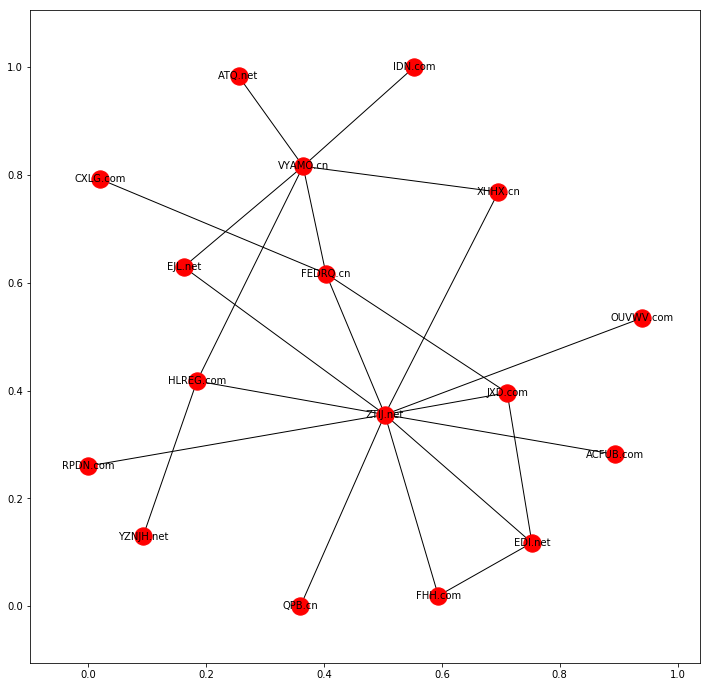

In [163]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [164]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)

[('ZTIJ.net', 0.22414771502486244),
 ('VYAMO.cn', 0.14428919651531763),
 ('FEDRQ.cn', 0.09969641455614009),
 ('HLREG.com', 0.06739523295565325),
 ('EDI.net', 0.06188439147159106),
 ('JXD.com', 0.06062619695451288),
 ('FHH.com', 0.043677690614533735),
 ('XHHX.cn', 0.04366433682810716),
 ('EJL.net', 0.04366433682810716),
 ('YZNJH.net', 0.02791922627656393),
 ('IDN.com', 0.02634411936831027),
 ('ATQ.net', 0.02634411936831027),
 ('QPB.cn', 0.02614374687156159),
 ('RPDN.com', 0.02614374687156159),
 ('OUVWV.com', 0.02614374687156159),
 ('ACFUB.com', 0.02614374687156159),
 ('CXLG.com', 0.025772035751743846)]